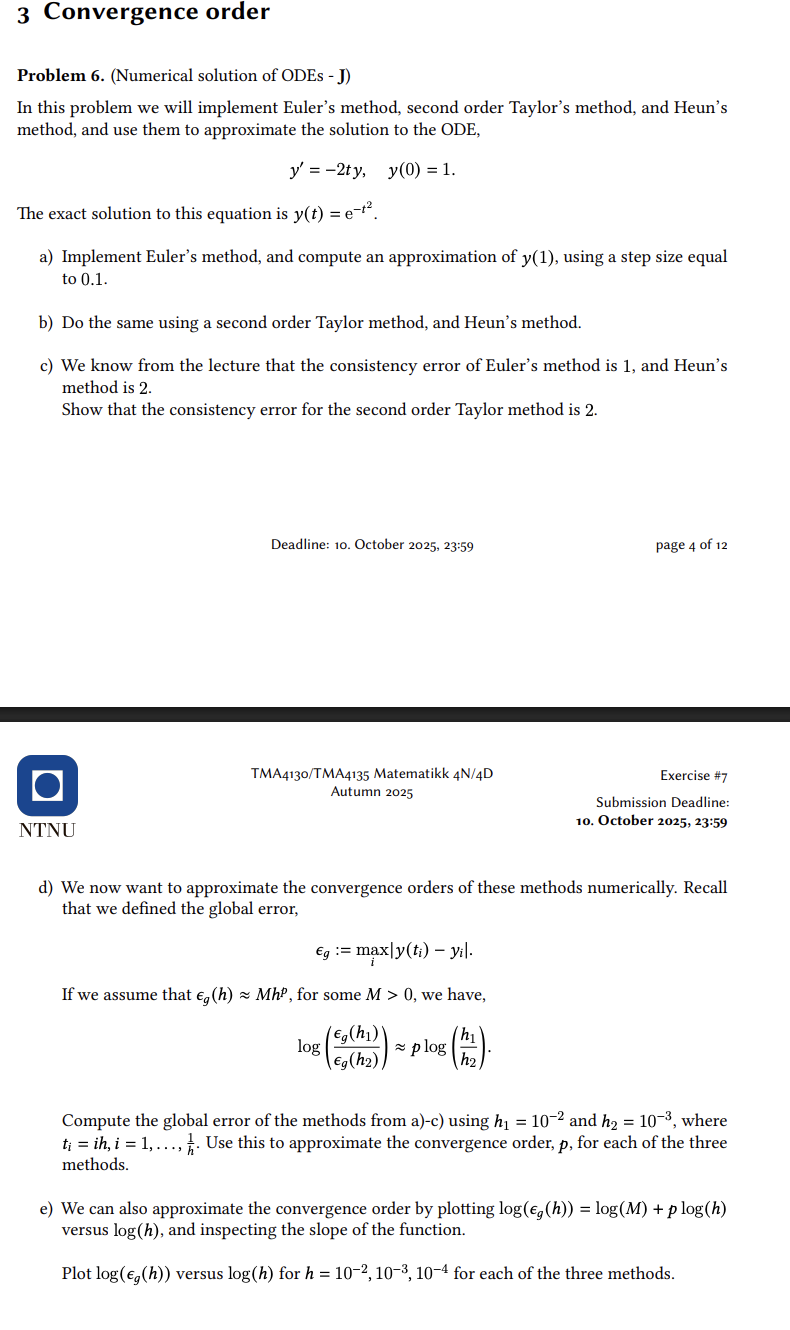

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import log

def f(t, y):
    return -2.0 * t * y

def exact(t):
    return np.exp(-t*t)


#A
def euler(t0, y0, h, T):
    N=int(round(T-t0)/h)
    t=t0
    y=y0
    ts=[t]
    ys=[y]
    for _ in range(N):
        y=y+h*f(t,y)
        t=t+h
        ts.append(t)
        ys.append(y)
    return np.array(ts), np.array(ys)
t0, y0, T = 0.0, 1.0, 1.0
h_a = 0.1
ts_e, ys_e = euler(t0, y0, h_a, T)
y1_euler = ys_e[-1]
y1_exact = float(exact(1.0))

print("a) Euler with h=0.1:")
print(f"  y(1) ≈ {y1_euler:.10f},  exact = {y1_exact:.10f},  abs err = {abs(y1_euler - y1_exact):.3e}")

#B
def heun(t0, y0, h, T):
    N = int(round((T - t0)/h))
    t = t0
    y = y0
    ts = [t]; ys = [y]
    for _ in range(N):
        k1 = f(t, y)
        y_tilde = y + h * k1
        k2 = f(t + h, y_tilde)
        y = y + 0.5 * h * (k1 + k2)
        t = t + h
        ts.append(t); ys.append(y)
    return np.array(ts), np.array(ys)


def taylor2(t0, y0, h, T):
    N = int(round((T - t0)/h))
    t = t0
    y = y0
    ts = [t]; ys = [y]
    for _ in range(N):
        k1 = f(t, y)               
        ft = -2.0 * y
        fy = -2.0 * t
        y = y + h * k1 + 0.5 * h*h * (ft + fy * k1)
        t = t + h
        ts.append(t); ys.append(y)
    return np.array(ts), np.array(ys)

ts_t2, ys_t2 = taylor2(t0, y0, h_a, T)
ts_h, ys_h = heun(t0, y0, h_a, T)
print("\nb) With h=0.1:")
print(f"  Taylor2 y(1) ≈ {ys_t2[-1]:.10f}, abs err = {abs(ys_t2[-1]-y1_exact):.3e}")
print(f"  Heun    y(1) ≈ {ys_h[-1]:.10f}, abs err = {abs(ys_h[-1]-y1_exact):.3e}")

a) Euler with h=0.1:
  y(1) ≈ 0.3817066806,  exact = 0.3678794412,  abs err = 1.383e-02

b) With h=0.1:
  Taylor2 y(1) ≈ 0.3652607980, abs err = 2.619e-03
  Heun    y(1) ≈ 0.3690533943, abs err = 1.174e-03


### c) Konsistensorden for Taylor 2-metoden


For ODE $y'(t) = f(t, y)$ har den eksakte løsningen Taylor-utvidelsen

$y(t + h) = y(t) + h\,y'(t) + \frac{h^2}{2}\,y''(t) + \frac{h^3}{6}\,y^{(3)}(\xi), \quad \xi \in (t, t + h).$

Ved kjerneregelen:

$y'(t) = f(t, y), \qquad y''(t) = f_t(t, y) + f_y(t, y)\,f(t, y).$

**Taylor 2-metoden** er gitt ved

$y_{n+1} = y_n + h\,f(t_n, y_n) + \frac{h^2}{2}\big(f_t(t_n, y_n) + f_y(t_n, y_n)\,f(t_n, y_n)\big).$

Setter vi inn den eksakte løsningen $y(t_n)$ i metoden og sammenlikner med $y(t_n + h)$, ser vi at leddene opp til og med $h^2$ samsvarer nøyaktig. Restleddet er

$y(t_n + h) - \Big[y(t_n) + h f + \frac{h^2}{2}(f_t + f_y f)\Big] = \frac{h^3}{6}\,y^{(3)}(\xi_n).$

Antar vi at $|y^{(3)}(t)| \le M$ på aktuelt intervall, får vi lokal trunkeringsfeil

$\text{LTE} = \mathcal{O}(h^3).$


Lokal feil av orden $\mathcal{O}(h^{p+1})$ betyr konsistensorden $p$.  
Her er $\text{LTE} = \mathcal{O}(h^3)$, altså

$\boxed{p = 2.}$

Dette stemmer med at Euler har $p = 1$ og Heun har $p = 2$.



d) Global errors and estimated orders (h1=1e-2, h2=1e-3):
  Euler  : Eg(h1)=3.277e-03, Eg(h2)=3.255e-04,  p≈1.003
  Taylor2: Eg(h1)=2.675e-05, Eg(h2)=2.666e-07,  p≈2.001
  Heun   : Eg(h1)=1.222e-05, Eg(h2)=1.226e-07,  p≈1.999


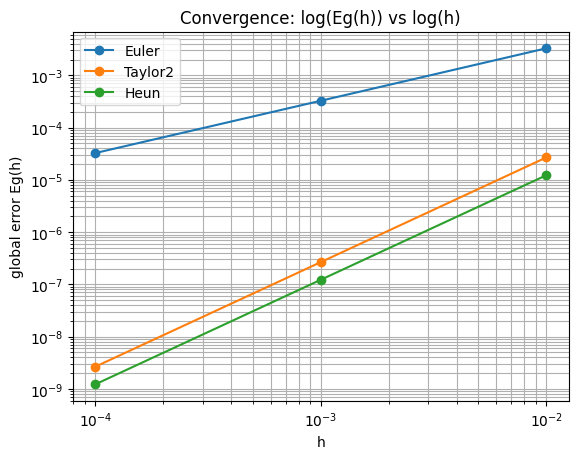

In [ ]:
#D
def global_error(method, h):
    ts, ys = method(t0, y0, h, T)
    err = np.max(np.abs(ys - exact(ts)))
    return float(err)

h1, h2 = 1e-2, 1e-3
methods = [("Euler", euler), ("Taylor2", taylor2), ("Heun", heun)]
orders = {}
print("\nd) Global errors and estimated orders (h1=1e-2, h2=1e-3):")
for name, meth in methods:
    eg1 = global_error(meth, h1)
    eg2 = global_error(meth, h2)
    p = np.log(eg1/eg2) / np.log(h1/h2)
    orders[name] = p
    print(f"  {name:7s}: Eg(h1)={eg1:.3e}, Eg(h2)={eg2:.3e},  p≈{p:.3f}")


#E
hs = np.array([1e-2, 1e-3, 1e-4], dtype=float)
errs = {}
for name, meth in methods:
    errs[name] = np.array([global_error(meth, h) for h in hs])

plt.figure()
for name in ["Euler", "Taylor2", "Heun"]:
    plt.loglog(hs, errs[name], marker='o', label=name)
plt.xlabel("h")
plt.ylabel("global error Eg(h)")
plt.title("Convergence: log(Eg(h)) vs log(h)")
plt.legend()
plt.grid(True, which="both")
plt.show()

print("\ne) Slopes from linear fit on log-log (should approximate order):")
for name in ["Euler", "Taylor2", "Heun"]:
    coeffs = np.polyfit(np.log(hs), np.log(errs[name]), 1)
    slope = coeffs[0]
    print(f"  {name:7s}: slope ≈ {slope:.3f}")